<a href="https://colab.research.google.com/github/andersonfedel/ENADE_MICRODADOS/blob/main/Enade_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Este Notebook faz uma análise dos resultados do ENADE 2019 (último realizado)
###O usuário pode escolher um curso e comparar com o perfil geral de todos os cursos avaliados. Aqui utilizaremos como exemplo o curso de Odontologia
###Este script foi inspirado na aula da Comunidade de Estatística prof. Thiago Marques link: http://comunidadedeestatistica.com.br/ 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import zipfile
import datetime
import requests, zipfile, io

sns.set_style("darkgrid")
sns.set(font='Liberation Sans')

In [ ]:
#Definindo url com dados do ENADE e diretórios a serem utilizados:
url = "https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip"
extract_dir = "/content/drive/MyDrive/Enade_Odonto/arquivo_zip/"


In [ ]:
#Célula para baixar arquivos do ENADE. Vai demorar o tempo de download para executar
#Caso já tenha baixado os arquivos, não precisa executar essa célula
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(extract_dir)


In [ ]:
#Após download, os dados baixados ficaram armazenados na variável 'urldados'.
urldados = extract_dir + "3.DADOS/microdados_enade_2019.txt"

#Montando o dataset:
df = pd.read_csv(urldados, delimiter=";", decimal=",")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,84,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_INSCRICAO_ADM,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,...,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,27,M,2010,2012.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,DACBCBDD,80111010,ABEEDDDAADEAEECBBABECCACBAA,111911010110999090010199011,555,555,555,555,555,555,336,...,7,1,3,5,7,7,1,1,2,6,4,1,3,6,1,1,1,1,1,2,2,6,2,1,8,1,3,2,5,6,2,5,1,1,2,5,8,7,1,2
1,2019,1,10002,10028,5710,3,1,5103403,51,5,26,M,2009,2015.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,CDCBDCBC,81110100,ABCECDEBAABCCCDDDBAEDCBADDA,110901100001999191111199001,555,555,555,555,555,555,555,...,2,1,3,2,3,3,1,2,1,2,3,2,1,6,1,1,1,1,2,1,2,5,3,1,2,7,2,1,4,3,1,4,2,2,2,5,4,4,2,2
2,2019,1,10002,10028,5710,3,1,5103403,51,5,23,M,2012,2016.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,,,,,222,222,222,222,222,222,222,...,2,1,3,2,2,2,2,2,1,1,2,1,2,6,1,1,1,4,1,1,2,6,3,1,1,2,2,2,5,2,3,4,4,3,3,4,1,1,1,4
3,2019,1,10002,10028,5710,3,1,5103403,51,5,24,M,2013,2014.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,ADCCACEB,81100101,EEEEAEDABAEADAEDACABDCCCDDC,001900011010999190101199000,555,555,555,555,555,555,555,...,3,2,4,5,5,4,5,4,3,2,3,3,4,6,4,4,8,3,3,2,2,8,8,3,1,1,3,3,4,3,3,5,2,2,2,3,3,4,3,3
4,2019,1,10002,10028,5710,3,1,5103403,51,5,41,M,2012,2013.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,,,,,222,222,222,222,222,222,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Após montagem inicial do dataset, faremos o tratamento dos dados para consumo

In [ ]:
#Função para padronizar decimais como "."
def TrocaDecimal(x):
  try: 
    if "," in str(x):
      return str(x).replace(",", ".")
    else:
      return x
  except:
    print(f"Erro:{x}")  

#Função para tratar espaços vazios
def TrataEspaco(x):
   try:
    float(x)
    return float(x)
   except:
     return np.nan

#Dicionários de dados das colunas escolhidas (de acordo com arquivo na pasta LEIA-ME):
Dicio_QE_I01 = {"A": "Solteiro(a)", "B": "Casado(a)", "C": "Separado(a) judicialmente/divorciado(a)", 
                "D": "Viúvo(a)", "E": "Outro", " ": "Outro"}

Dicio_QE_I02 = {"A" : "Branca", "B" : "Preta", "C" : "Amarela", "D" : "Parda", 
                "E" : "Indígena", "F" : "Não declarado", " ": "Não declarado"}

Dicio_CO_REGIAO_CURSO = {1 : "Região Norte (NO)",2 : "Região Nordeste (NE)",
                         3 : "Região Sudeste (SE)", 4 : "Região Sul (SUL)",
                         5 : "Região Centro-Oeste (CO)"}

Dicio_QE_I23 = {"A" : "Nenhuma, apenas assisto às aulas", "B" : "De uma a três",
                "C" : "De quatro a sete", "D" : "De oito a doze", "E" : "Mais de doze", 
                " ": "Não informado"}     

#Dicionário de Cursos
Dicio_CO_GRUPO = {5 : "MEDICINA VETERINÁRIA", 
6 : "ODONTOLOGIA", 
12 : "MEDICINA", 
17 : "AGRONOMIA",
19 : "FARMÁCIA",
21 : "ARQUITETURA E URBANISMO",
23 : "ENFERMAGEM",
27 : "FONOAUDIOLOGIA",
28 : "NUTRIÇÃO",
36 : "FISIOTERAPIA",
51 : "ZOOTECNIA",
55 : "BIOMEDICINA",
69 : "TECNOLOGIA EM RADIOLOGIA",
90 : "TECNOLOGIA EM AGRONEGÓCIOS",
91 : "TECNOLOGIA EM GESTÃO HOSPITALAR",
92 : "TECNOLOGIA EM GESTÃO AMBIENTAL",
95 : "TECNOLOGIA EM ESTÉTICA E COSMÉTICA",
3501 : "EDUCAÇÃO FÍSICA (BACHARELADO)",
4003 : "ENGENHARIA DA COMPUTAÇÃO",
5710 : "ENGENHARIA CIVIL",
5806 : "ENGENHARIA ELÉTRICA",
5814 : "ENGENHARIA DE CONTROLE E AUTOMAÇÃO",
5902 : "ENGENHARIA MECÂNICA",
6002 : "ENGENHARIA DE ALIMENTOS",
6008 : "ENGENHARIA QUÍMICA",
6208 : "ENGENHARIA DE PRODUÇÃO",
6307 : "ENGENHARIA AMBIENTAL",
6405 : "ENGENHARIA FLORESTAL",
6410 : "TECNOLOGIA EM SEGURANÇA NO TRABALHO"}     

Dicio_TP_SEXO = {"F":"Feminino", "M":"Masculino"}


In [ ]:
#Tratando de decimais e espaços em branco
df["NT_OBJ_CE"] = df["NT_OBJ_CE"].apply(TrocaDecimal)
df["NT_OBJ_CE"] = df["NT_OBJ_CE"].apply(TrataEspaco)
df["NT_OBJ_FG"] = df["NT_OBJ_FG"].apply(TrocaDecimal)
df["NT_OBJ_FG"] = df["NT_OBJ_FG"].apply(TrataEspaco)
df["NT_GER"] = df["NT_GER"].apply(TrocaDecimal)
df["NT_GER"] = df["NT_GER"].apply(TrataEspaco)

#Modificando dtypes:
df = df.astype({"NT_GER":"float32", "NT_OBJ_FG":"float32", "NT_OBJ_CE":"float32"})

#Aplicando dicionários de dados
df["QE_I01"] = df["QE_I01"].apply(lambda x: Dicio_QE_I01[x])
df["QE_I02"] = df["QE_I02"].apply(lambda x: Dicio_QE_I02[x])
df["CO_REGIAO_CURSO"] = df["CO_REGIAO_CURSO"].apply(lambda x: Dicio_CO_REGIAO_CURSO[x])
df["CO_GRUPO"] = df["CO_GRUPO"].apply(lambda x: Dicio_CO_GRUPO[x])
df["TP_SEXO"] = df["TP_SEXO"].apply(lambda x: Dicio_TP_SEXO[x])
df["QE_I23"] = df["QE_I23"].apply(lambda x: Dicio_QE_I23[x])



##Aqui iniciaremos a visualização dos dados obtidos

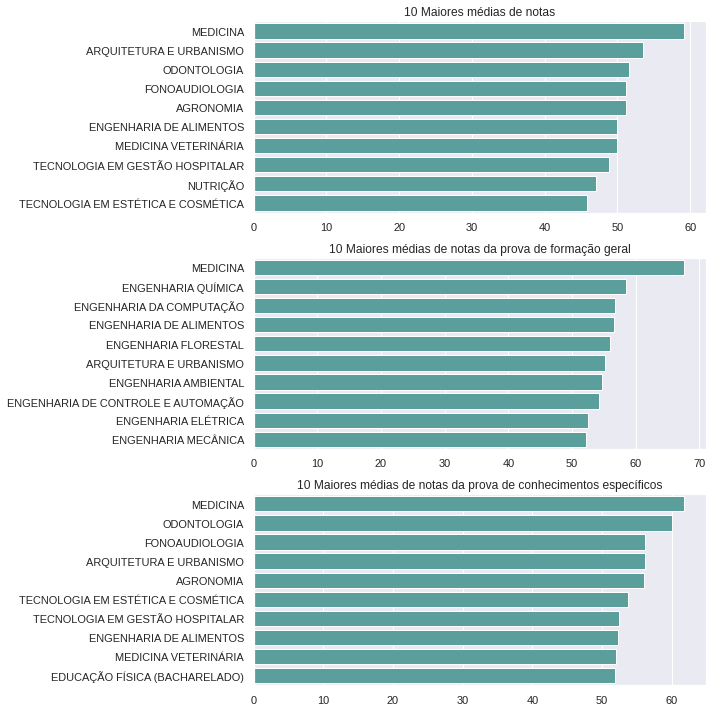

In [ ]:

#Dataset com notas por curso
notas = df.groupby("CO_GRUPO")[["NT_GER", "NT_OBJ_FG", "NT_OBJ_CE"]].mean().sort_values("NT_OBJ_FG", ascending=False)[0:10].reset_index()

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(10,10)


#Notas gerais
notas = df.groupby("CO_GRUPO")[["NT_GER", "NT_OBJ_FG", "NT_OBJ_CE"]].mean().sort_values( "NT_GER", ascending=False)[0:10].reset_index()
sns.barplot(data= notas, 
            y = "CO_GRUPO", 
            x = "NT_GER", 
            color="#4eaba6", 
            orient="h", 
             ax=axes[0]); 
axes[0].set_title("10 Maiores médias de notas");
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
plt.tight_layout()

#Nota formação geral
notas = df.groupby("CO_GRUPO")[["NT_GER", "NT_OBJ_FG", "NT_OBJ_CE"]].mean().sort_values("NT_OBJ_FG", ascending=False)[0:10].reset_index()
sns.barplot(data= notas, 
            y = "CO_GRUPO", 
            x = "NT_OBJ_FG", 
            color="#4eaba6", 
            orient="h",  
            ax=axes[1]); 
axes[1].set_title("10 Maiores médias de notas da prova de formação geral");
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
plt.tight_layout()

#Nota formação geral
notas = df.groupby("CO_GRUPO")[["NT_GER", "NT_OBJ_FG", "NT_OBJ_CE"]].mean().sort_values("NT_OBJ_CE", ascending=False)[0:10].reset_index()
sns.barplot(data= notas, 
            y = "CO_GRUPO", 
            x = "NT_OBJ_CE", 
            color="#4eaba6", 
            orient="h",  
            ax=axes[2]); 
axes[2].set_title("10 Maiores médias de notas da prova de conhecimentos específicos");
axes[2].set(xlabel=None)
axes[2].set(ylabel=None)
plt.tight_layout()


##Selecionaremos um curso para fazer os comparativos com os demais

In [ ]:
#Selecionando o curso de Odontologia

curso = "ODONTOLOGIA"

dfodonto = df[df["CO_GRUPO"] == curso]

#Reduzindo DataFrame para colunas de interesse
colunas = ["CO_GRUPO", "CO_REGIAO_CURSO", "NU_IDADE", "TP_SEXO", "CO_TURNO_GRADUACAO", 
"NT_GER", "QE_I01", "QE_I02", "QE_I23", "NT_OBJ_FG", "NT_OBJ_CE" ]

dfodonto = dfodonto[colunas].drop("CO_GRUPO", axis=1)

print("Descrição geral das variáveis núméricas obtidas")
dfodonto.describe()

Descrição geral das variáveis núméricas obtidas


,NU_IDADE,CO_TURNO_GRADUACAO,NT_GER,NT_OBJ_FG,NT_OBJ_CE
count,17720.000000,17720.000000,17057.000000,17057.000000,17057.000000
mean,25.613657,2.875959,51.523125,50.430798,60.005138
std,5.154638,0.530218,12.726813,21.120077,14.846572
min,20.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,3.000000,43.099998,42.900002,50.000000
50%,24.000000,3.000000,52.200001,57.099998,59.099998
75%,26.000000,3.000000,60.799999,71.400002,72.699997
max,67.000000,4.000000,88.800003,100.000000,100.000000


##Visualização dos comparativos do curso escolhido com todos os cursos avaliados 

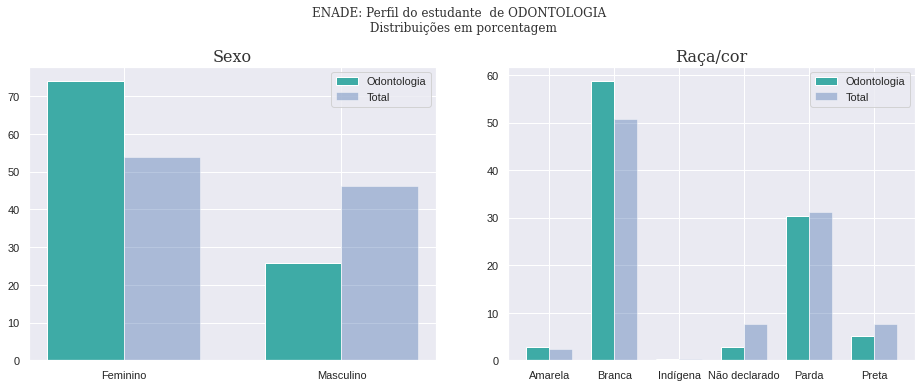

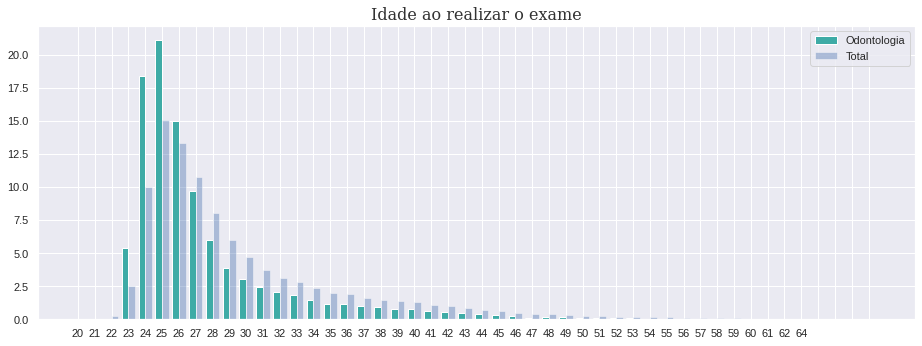

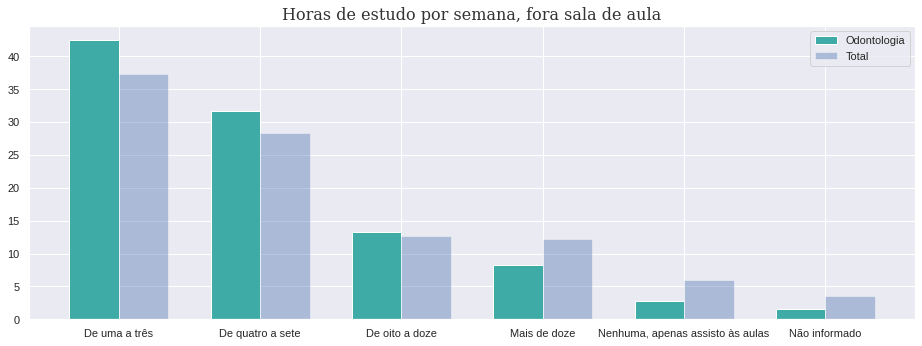

In [ ]:
#Plotando resultados 

estudoTOTAL = df.groupby("QE_I23")["QE_I23"].count().sort_values(ascending=False)
sexoTOTAL = df.groupby("TP_SEXO")["TP_SEXO"].count()
racacorTOTAL = df.groupby("QE_I02")["QE_I02"].count()
idadeTOTAL = df[(18 <= df["NU_IDADE"]) & (df["NU_IDADE"] <= 65)].groupby("NU_IDADE")["NU_IDADE"].count() #Retirado valores abaixo de 18 e acima de 65

estudo = dfodonto.groupby("QE_I23")["QE_I23"].count().sort_values(ascending=False)
sexo = dfodonto.groupby("TP_SEXO")["TP_SEXO"].count()
racacor = dfodonto.groupby("QE_I02")["QE_I02"].count()
idade =  dfodonto[(18 <= dfodonto["NU_IDADE"]) & (dfodonto["NU_IDADE"] <= 65)].groupby("NU_IDADE")["NU_IDADE"].count() #Retirado valores abaixo de 18 e acima de 65

font = {'family': 'serif',
        'color':  "000000",
        'weight': 'normal',
        'size': 16,
        'alpha': 0.8
        }

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(bottom=0.1)
fig.set_size_inches(14,6)

plt.suptitle(f"ENADE: Perfil do estudante  de {curso} \n Distribuições em porcentagem", fontdict=font);

#Distribuição por sexo
bar_width = 0.35
index = np.arange(len(sexo.index))

odo = axes[0].bar(index, 
            (100 * sexo.values/ sexo.values.sum()).round(1),
            bar_width,
            label = "Odontologia", 
            color="#3eaba6");

total = axes[0].bar(index + bar_width,  
                (100 * sexoTOTAL.values/ sexoTOTAL.values.sum()).round(1),
                 bar_width,
                 label= "Total", alpha=0.4);

axes[0].set_xticks(index + bar_width / 2)                    
axes[0].set_xticklabels(sexo.index.values)
axes[0].set_title("Sexo", fontdict=font);
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[0].legend()

plt.tight_layout( pad=5)
#plt.show()

#Distribuição por raça/cor


bar_width = 0.35
index = np.arange(len(racacor.index))

odo2 = axes[1].bar(index, 
            (100 * racacor.values/ racacor.values.sum()).round(1),
            bar_width,
            label = "Odontologia", 
            color="#3eaba6");

total2 = axes[1].bar(index + bar_width,  
                (100 * racacorTOTAL.values/ racacorTOTAL.values.sum()).round(1),
                 bar_width,
                 label= "Total", alpha=0.4);

axes[1].set_xticks(index + bar_width / 2)                    
axes[1].set_xticklabels(racacor.index.values)
axes[1].set_title("Raça/cor", fontdict=font);
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
axes[1].legend()

plt.tight_layout( pad=5)
plt.show()

#Idade ao realizar o exame

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(14,6)
bar_width = 0.4
index = np.arange(min(idade.index.min(), idadeTOTAL.index.min()), max(idade.index.max(), idadeTOTAL.index.max()+1)) #Tratando idades faltantes
serieidade = pd.Series(np.zeros((len(index))), index=index)

odo = axes.bar(index, 
            idade.apply(lambda x: 100*(x/idade.values.sum())) + serieidade,
            bar_width,
            label = "Odontologia", 
            color="#3eaba6");

total = axes.bar(index + bar_width,  
                idadeTOTAL.apply(lambda x: 100*(x/idadeTOTAL.values.sum())) + serieidade,
                 bar_width,
                 label= "Total", alpha=0.4);

axes.set_xticks(index + bar_width / 2)                    
axes.set_xticklabels(idade.index.values)
axes.set_title("Idade ao realizar o exame", fontdict=font);
axes.set(xlabel=None)
axes.set(ylabel=None)
axes.legend(loc="upper right")

plt.tight_layout(pad=5)
plt.show()

#Horas de estudo
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(14,6)
bar_width = 0.35
index = np.arange(len(estudo.index))

odo = axes.bar(index, 
            (100 * estudo.values/ estudo.values.sum()).round(1),
            bar_width,
            label = "Odontologia", 
            color="#3eaba6");

total = axes.bar(index + bar_width,  
                (100 * estudoTOTAL.values/ estudoTOTAL.values.sum()).round(1),
                 bar_width,
                 label= "Total", alpha=0.4);

axes.set_xticks(index + bar_width / 2)                    
axes.set_xticklabels(estudo.index.values)
axes.set_title("Horas de estudo por semana, fora sala de aula", fontdict=font);
axes.set(xlabel=None)
axes.set(ylabel=None)
axes.legend()

plt.tight_layout( pad=5)
plt.show()